## Week 10 exercise (PCA)
## name: Muhamad Azri Anwar bin Azahar
## matrix number: 17112653/2

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
array=np.matrix([[1,2,3,4],
                 [5,5,6,7],
                 [1,4,2,3],
                 [5,3,2,1],
                 [8,1,2,2]])
df=pd.DataFrame(array,columns=['f1','f2','f3','f4'])
df_mean=df.mean()
df_sd=df.std()
df_std=(df-df.mean())/(df.std())
print(df_mean , "\n")
print(df_sd , "\n")
print(df_std)

f1    4.0
f2    3.0
f3    3.0
f4    3.4
dtype: float64 

f1    3.000000
f2    1.581139
f3    1.732051
f4    2.302173
dtype: float64 

         f1        f2        f3        f4
0 -1.000000 -0.632456  0.000000  0.260623
1  0.333333  1.264911  1.732051  1.563740
2 -1.000000  0.632456 -0.577350 -0.173749
3  0.333333  0.000000 -0.577350 -1.042493
4  1.333333 -1.264911 -0.577350 -0.608121


In [95]:
df_cov = df_std.cov(ddof=0)
print(df_cov)

          f1        f2        f3        f4
f1  0.800000 -0.252982  0.038490 -0.144791
f2 -0.252982  0.800000  0.511208  0.494498
f3  0.038490  0.511208  0.800000  0.752355
f4 -0.144791  0.494498  0.752355  0.800000


In [97]:
df_eigen_v,df_eigen_vector=np.linalg.eig(df_cov.to_numpy())
print("eigen value \n",df_eigen_v)
print("eigen vector \n",df_eigen_vector)

eigen value 
 [2.01263459 0.8522308  0.31510964 0.02002497]
eigen vector 
 [[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


In [110]:
k=1
error=[]
while(k<=4):
  print("k=",k)
  checker=df_eigen_vector[:,0:k]
  # print(checker)
  array_check=np.dot(df_std,checker)
  print("transformed matrix \n",array_check)
  array_check=np.dot(array_check,np.linalg.pinv(checker))
  print("re standardized\n",array_check)
  array_check=(array_check*df_sd.to_numpy())+df_mean.to_numpy()
  print("back computed matrix transform \n",array_check)
  mse=(np.square(array - array_check)).mean(axis=None)
  error.append(mse)
  print("error \n",mse,"\n")
  k+=1

k= 1
transformed matrix 
 [[ 0.01400331]
 [-2.55653399]
 [-0.05148019]
 [ 1.01415002]
 [ 1.57986086]]
re standardized
 [[ 0.00226797 -0.00733841 -0.00820449 -0.00835363]
 [-0.41405588  1.33974687  1.49786425  1.52509174]
 [-0.00833772  0.0269781   0.03016206  0.03071033]
 [ 0.16425159 -0.53146343 -0.59418692 -0.60498778]
 [ 0.25587404 -0.82792314 -0.92563491 -0.94246067]]
back computed matrix transform 
 [[4.00680392 2.98839696 2.98578941 3.38076851]
 [2.75783237 5.1183258  5.59437698 6.91102485]
 [3.97498683 3.04265612 3.05224223 3.4707005 ]
 [4.49275477 2.15968254 1.97083807 2.00721355]
 [4.76762211 1.69093858 1.39675331 1.2302926 ]]
error 
 2.028590875797744 

k= 2
transformed matrix 
 [[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]
re standardized
 [[-0.6910054   0.14908911 -0.25052419 -0.09599765]
 [ 0.30164601  1.17825867  1.74802338  1.61557119]
 [-1.15

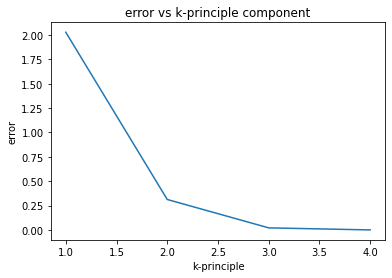

In [109]:
k=[1,2,3,4]
plt.plot(k,error)

plt.title("error vs k-principle component")
plt.xlabel("k-principle")
plt.ylabel("error")
plt.show()

## As the number of principal components increases,  real information and classification incorperated improves.